# Report

---

In this notebook, we will see an implementation for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## Implementation specs

### Summary

We implement a [Deep Q-Network](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf) with the following extensions:

* [Double DQN](https://arxiv.org/abs/1509.06461)
* [Dueling networks](https://arxiv.org/abs/1511.06581)

A summary of famous extensions to the DQN framework can be found on the [Rainbow DQN paper](https://arxiv.org/abs/1710.02298) -- though we only implement the extensions listed above.

Note that this implementation is built as an extension of the provided solution for the [DQN example](https://github.com/udacity/deep-reinforcement-learning/tree/master/dqn/solution), rather than implemented from scratch, but adds non-trivial technical extensions to it.


### Details

The agent keeps track of two DQNs: a local version, and a target version, one updated less often than the other.

#### Dueling DQNs

Each DQN is an Actor (Policy) model, mapping states to a list of action values for each action:

    s -> [Q(s, a) for a in Actions]

The network structure of the dueling networks generate independent estimates for the value function and the advantage function:

    s -> Linear(state_size, fc1_units) -> ReLU -> x
    x -> Linear(fc1_units, fc2_units / 2) -> ReLU -> Linear(fc2_units / 2, 1) -> V(s)
    x -> Linear(fc1_units, fc2_units / 2) -> ReLU -> Linear(fc2_units / 2, action_size) -> A(s, a)

The estimates for value and advantage are then combined as follows:

$$ Q(s, a) = V(s) + \left(A(s, a) - \frac{1}{|\mathcal{A}|} \sum_{a_i \in \mathcal{A}} A(s, a_i) \right)$$
     
By default, 64 units are used on the first layer, and 64 units on the second layer, split between the value function network and the advantage function network.

These networks are defined in `model.py`.

#### Double DQNs

On the update operation, rather than just using the local network to both select the best action and compute its estimated
value, we use the local network to pick an action, and then use the target network to compute its estimated value:

$$ Q_{expected} = R + \gamma Q_{network}(s', \underset{a \in \mathcal{A}}{\operatorname{argmax}} Q_{local}(s', a)) $$

This operation is performed at the `learn` method on the agent, in `dqn_agent.py`.
    
    

#### Hyperparameters

Agent hyperparameters may be passed as constructor arguments to `Agent`.  The default values, used in this workbook, are:

| parameter    | value  | description                                                                   |
|--------------|--------|-------------------------------------------------------------------------------|
| buffer_size  | 100000 | Number of experiences to keep on the replay memory for the DQN                |
| batch_size   | 64     | Minibatch size used at each learning step                                     |
| gamma        | 0.99   | Discount applied to future rewards                                            |
| tau          | 1e-3   | Scaling parameter applied to soft update                                      |
| learn_rate   | 5e-4   | Learning rate used for the Adam optimizer                                     |
| update_every | 4      | Number of agent steps between update operations                               |


Training hyperparameters are passed on the training function itself, `dqn`, defined below.  The default values are:

| parameter                     | value            | description                                                             |
|-------------------------------|------------------|-------------------------------------------------------------------------|
| n_episodes                    | 20000             | Maximum number of training episodes                                     |
| max_t                         | 1000             | Maximum number of steps per episode                                     |
| eps_start, eps_end, eps_decay | (1, 0.01, 0.995) |  Interpolation parameters for decaying epsilon on epsilon-greedy policy |
| solved_score                  | 16    | Average score required to consider problem solved                       |

## Code
The full code of this project can be found in the notebook
[Navigation.ipynb](./Navigation.ipynb)

## Result
#### Number of Episode solved the problem
The problem was solved in the 1171 episode while the average score is 16.04
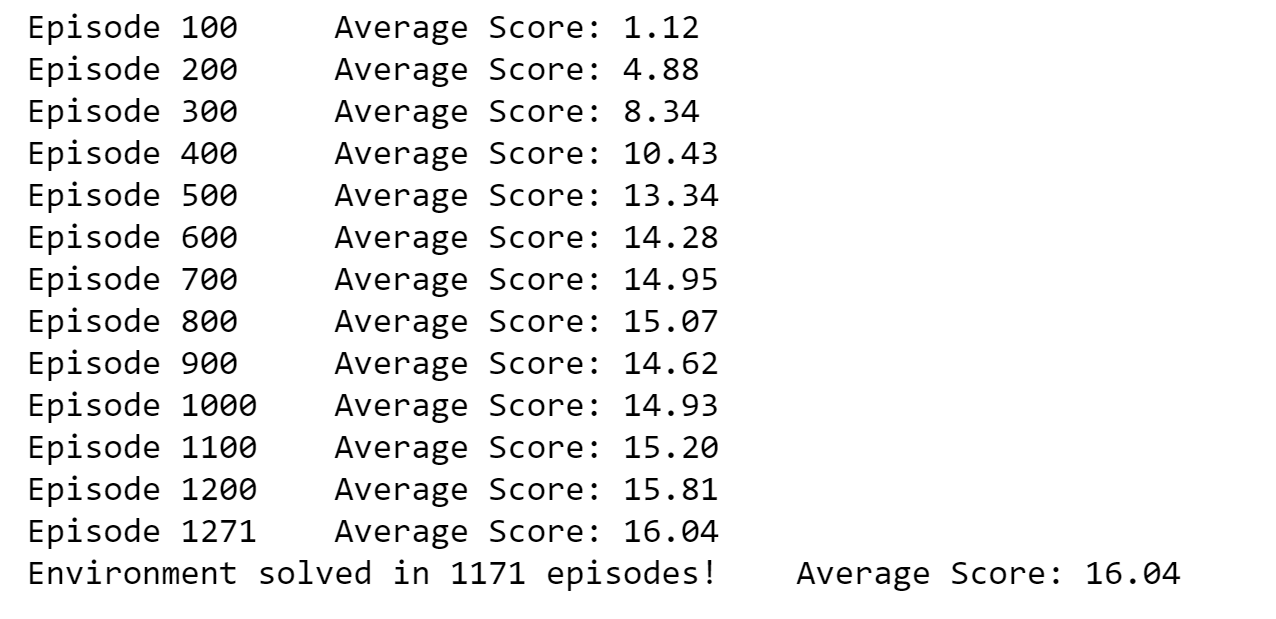

#### Averaged score versus episode number
The plot of averaged score versus episode number is shown as below:
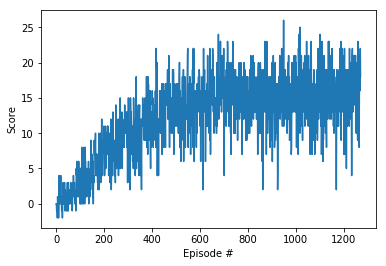

## Ideas for future work

* Implement remaining extensions on Rainbow DQN for this toy example
* Perform a larger hyperparameter search, including hyper parameter annealing
* Review literature for more recent DQN extensions